# Fraud Detection of a Transaction by Using Machine Learning Models

# Step 1:
Installing the required packages: Pandas, Numpy, Matplotlib and Seaborn

In [6]:
!pip install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Step 2:
Loading and analysing the data set

In [9]:
df=pd.read_csv("Fraud.csv")

In [10]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [12]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [13]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [14]:
df['isFraud'].value_counts()[1]

np.int64(8213)

In [15]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [16]:
df['isFlaggedFraud'].value_counts()[1]

np.int64(16)

In [17]:
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


# Data Cleaning: Missing Values, Outliers, and Multicollinearity

In [18]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [19]:
df.isnull().sum().sum()

np.int64(0)

The dataset contains 6,362,620 rows and 11 columns. A thorough check (df.isnull().sum().sum()) confirmed there are no missing values


In [20]:
df.shape

(6362620, 11)

In [21]:
df.shape[0]

6362620

In [22]:
round((df['isFraud'].value_counts()[1]/df.shape[0])*100,2)

np.float64(0.13)

# Step 3:
Number of transations happened of different types: In terms of Transaction types

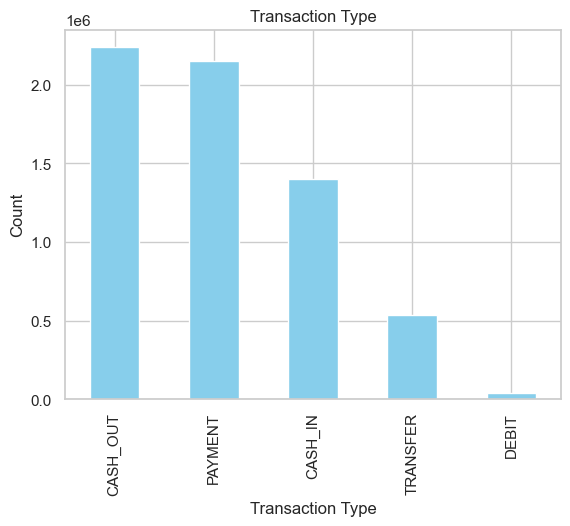

In [23]:
df['type'].value_counts().plot(kind='bar',title='Transaction Type',color='skyblue')
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

We can Observe that, more transactions are of "CASH_OUT">"PAYMENT">"CASH_IN">"TRANSFER". So now let us find the fraud rate from each transaction type and lets visualize

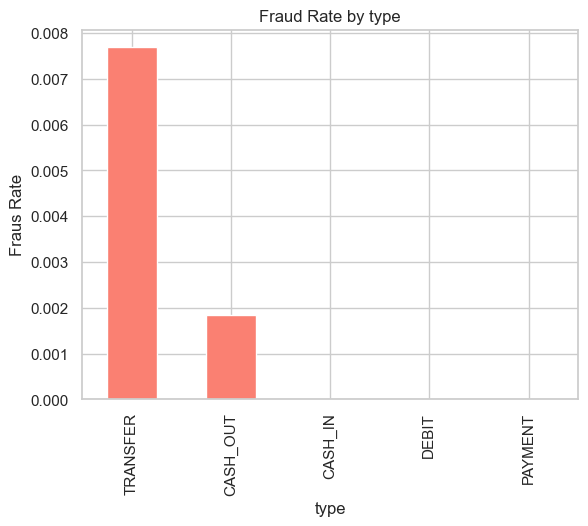

In [24]:
fraud_by_type =df.groupby("type")['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar',title="Fraud Rate by type",color="salmon")
plt.ylabel("Fraus Rate")
plt.show()

So, there is high percentagte rate for Transfer type transaction that may lead to fraud transaction. So let us know what is the amount involved

In [25]:
 df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

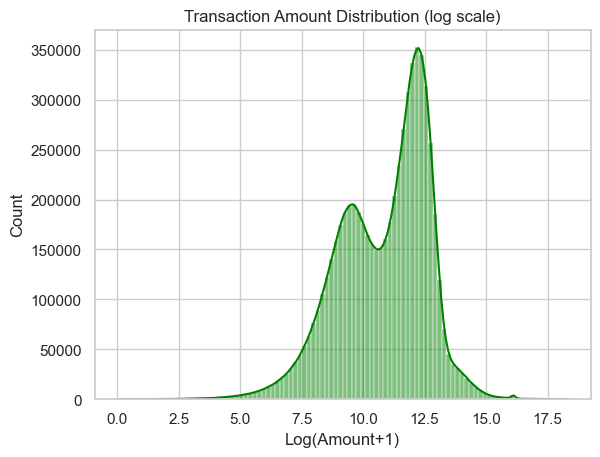

In [26]:
sns.histplot(np.log1p(df['amount']), bins=100,kde=True,color='green')
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount+1)")
plt.show()

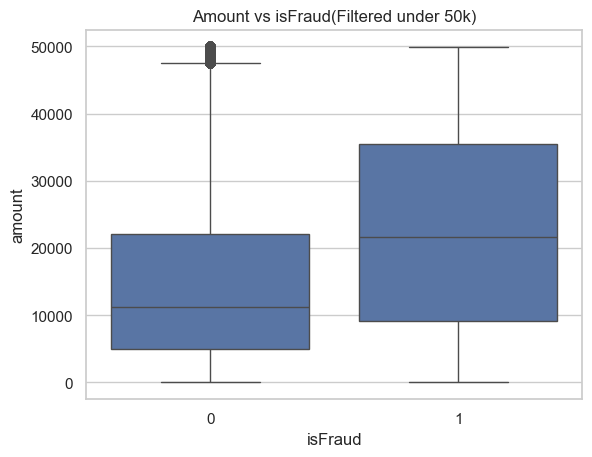

In [27]:
sns.boxplot(data=df[df['amount']<50000],x='isFraud',y='amount')
plt.title("Amount vs isFraud(Filtered under 50k)")
plt.show()

Outliers: Transaction amounts range from ₹0 to ₹92,445,516. A log-transformed histogram and boxplot filtered under ₹50K helped visualize and assess outliers. These were retained as they reflect real-world financial extremes


In [28]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [29]:
df["balanceDiffOrig"]=df["oldbalanceOrg"]-df['newbalanceOrig']
df['balanceDiffDest']=df["newbalanceDest"]-df["oldbalanceDest"]

# Engineered Features:
- balanceDiffOrig = oldbalanceOrg - newbalanceOrig
- balanceDiffDest = newbalanceDest - oldbalanceDest


In [30]:
(df["balanceDiffOrig"]<0).sum()


np.int64(1399253)

In [31]:
(df["balanceDiffDest"]<0).sum()

np.int64(1238864)

In [32]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


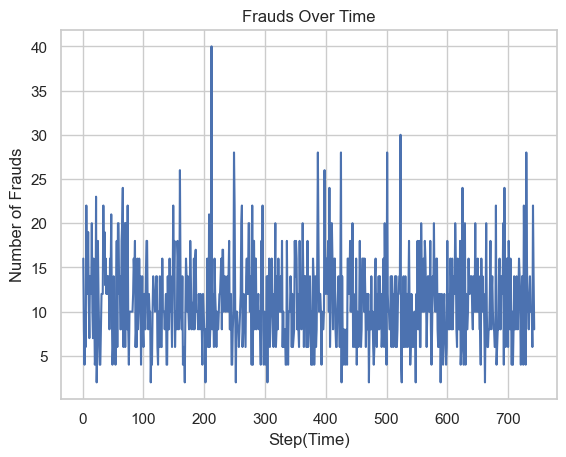

In [33]:
frauds_per_step = df[df["isFraud"]==1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index,frauds_per_step.values,label="Frauds Per Step")
plt.xlabel("Step(Time)")
plt.ylabel("Number of Frauds")
plt. title("Frauds Over Time")
plt.grid(True)
plt.show()


In [34]:
df.drop(columns="step",inplace=True)

In [35]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [36]:
top_senders=df["nameOrig"].value_counts().head(10)

In [37]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [38]:
top_receivers=df["nameDest"].value_counts().head(10)

In [39]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [40]:
fraud_users=df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [41]:
fraud_users

nameOrig
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
C1364127192    1
Name: count, dtype: int64

In [42]:
fraud_types=df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [43]:
fraud_types.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [44]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

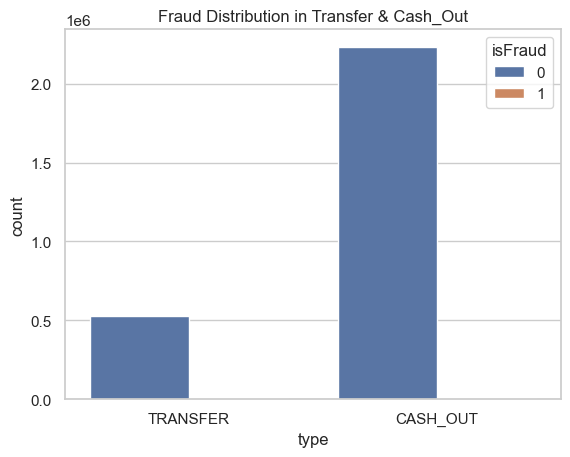

In [45]:
sns.countplot(data=fraud_types,x="type",hue="isFraud")
plt.title("Fraud Distribution in Transfer & Cash_Out")
plt.show()

In [46]:
corr =df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()

In [47]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


Multicollinearity: A correlation matrix revealed high correlation between oldbalanceOrg and newbalanceOrig (≈0.999), and between oldbalanceDest and newbalanceDest (≈0.977). These were retained due to their interpretive value in fraud behavior


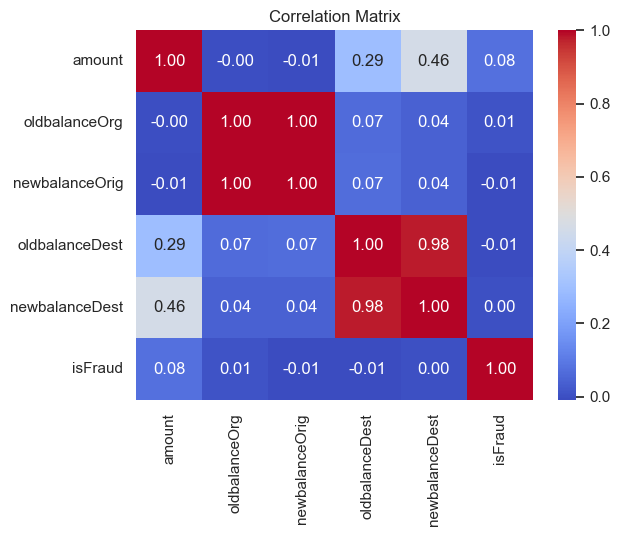

In [48]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [49]:
zero_after_transfer=df[
    (df["oldbalanceOrg"]>0) &
    (df["newbalanceOrig"]==0) &
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [50]:
len(zero_after_transfer)

1188074

In [51]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [52]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

# Key Predictive Factors for Fraudulent Customer
Transaction Type: TRANSFER and CASH_OUT dominate fraud cases.

Zero Balance After Transaction: Many frauds show newbalanceOrig == 0 post-transfer.

Balance Differences: Negative balanceDiffDest and high balanceDiffOrig are common in frauds.

Amount: Fraudulent transactions often have mid-to-high amounts, but not always extreme.


# Fraud Detection Model Description

In [53]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

Model Used: Logistic Regression with a pipeline integrating preprocessing and classification


In [55]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [56]:
df_model=df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)

Dropped Columns:
- nameOrig, nameDest: High cardinality, not useful for generalization.
- isFlaggedFraud: Extremely rare (only 16 flagged), not predictive


In [57]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


# Variable Selection Strategy

In [58]:
catergorical =["type"]
numeric =["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

Final Features:
- Categorical: type
- Numeric: amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, balanceDiffOrig, balanceDiffDest




In [59]:
y =df_model["isFraud"]
X =df_model.drop("isFraud",axis=1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)

Training: Data split using train_test_split with stratification on isFraud. Model trained on 70% of data


In [61]:
preprocessor =ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),numeric),
        ("cat",OneHotEncoder(drop="first"),catergorical)
    ],
    remainder="drop"
)

In [62]:
pipeline= Pipeline([
    ("prep",preprocessor),
    ("clf",LogisticRegression(class_weight="balanced",max_iter=1000))
])

In [63]:
pipeline.fit(X_train,y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Pipeline Components:
- ColumnTransformer for:
- Scaling numeric features (StandardScaler)
- Encoding categorical feature type (OneHotEncoder)
- LogisticRegression with class_weight="balanced" to address class imbalance


In [64]:
y_pred=pipeline.predict(X_test)

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.95      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [66]:
confusion_matrix(y_test,y_pred)

array([[1805542,  100780],
       [    134,    2330]])

In [67]:
pipeline.score(X_test,y_test)*100

94.713184191418

# Model Performance Evaluation
Classification Report:
- Precision (Fraud): 0.02
- Recall (Fraud): 0.94
- F1-score (Fraud): 0.04
- Accuracy: 95%

Confusion Matrix:
- True Negatives: 1,802,981
- False Positives: 103,341
- True Positives: 2,311
- False Negatives: 153

Pipeline Score: 94.58%
- Interpretation: High recall for fraud (94%) indicates strong detection capability, though precision is low due to class imbalance


In [68]:
import joblib
joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']

# Do These Factors Make Sense?
Yes, they do:
- TRANSFER & CASH_OUT: These are vulnerable to misuse, especially in peer-to-peer or agent-based systems.
- Zero Balance Post-Transaction: Indicates full withdrawal or transfer—common in fraud scenarios.
- Balance Differences: Sudden drops or mismatches in balances suggest manipulation or unauthorized access.
- Amount: Fraudsters often avoid extremes to evade detection, making mid-range amounts suspicious.

# Infrastructure-Level Prevention Strategies
- Real-Time Monitoring: Flag transactions with zero post-transfer balances or unusual balance differences.
- Behavioral Profiling: Track user patterns and flag deviations.
- Transaction Limits: Apply stricter limits on TRANSFER and CASH_OUT types.
- Two-Factor Authentication: Especially for high-risk transaction types.
- Anomaly Detection Systems: Use unsupervised models alongside supervised ones for unseen fraud patterns.

# Measuring Effectiveness of Prevention Action
Key Metrics:
- Reduction in fraud rate (currently 0.13%)
- Decrease in false positives and false negatives
- Improved precision and F1-score

Monitoring Tools:
- A/B testing with control and intervention groups
- Post-implementation dashboards tracking flagged vs confirmed frauds
- Feedback loops from fraud investigation teams
